In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename(columns={'v1':'output', 'v2':'text'}, inplace=True)

In [7]:
df.head(5)

,output,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.duplicated().sum()

403

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.head(5)

,output,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

output    0
text      0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['output'] = encoder.fit_transform(df['output'])

In [14]:
df.head(5)

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['output'].value_counts()

output
0    4516
1     653
Name: count, dtype: int64

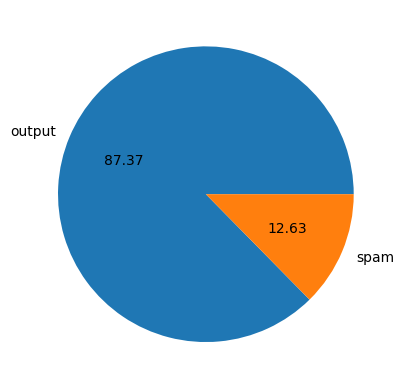

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['output'].value_counts(), labels=['output', 'spam'], autopct="%0.2f")
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_char'] = df['text'].apply(len)

In [20]:
df.head(3)

,output,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [21]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [22]:
df.head(3)

,output,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37


In [23]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head(3)

,output,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2


In [25]:
df[df['output'] == 0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['output'] == 1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
import seaborn as sns

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


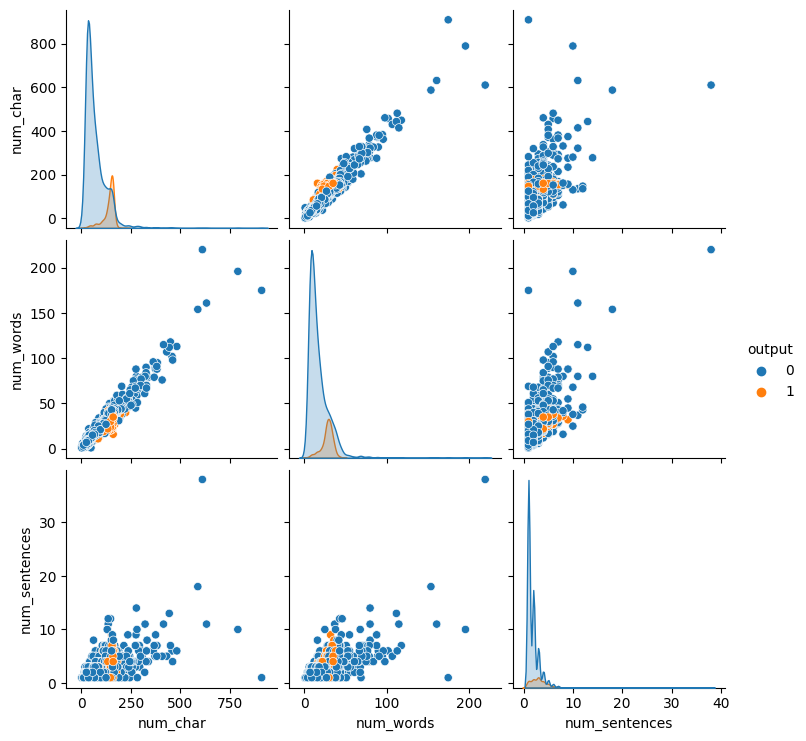

In [28]:
sns.pairplot(df, hue='output')

In [29]:
df2 = df[['output', 'num_char', 'num_words', 'num_sentences']]

In [30]:
df2.head(2)

,output,num_char,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2


In [31]:
df2.corr()

,output,num_char,num_words,num_sentences
output,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

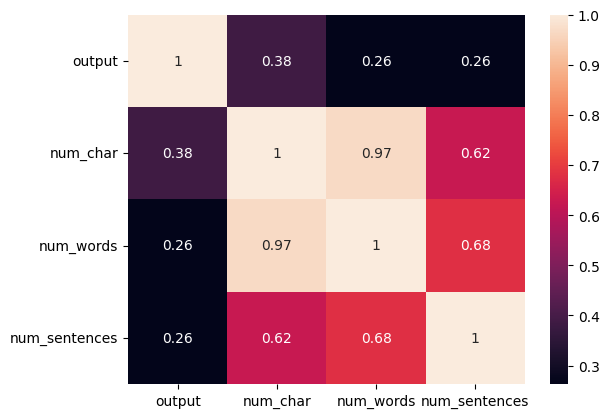

In [32]:
sns.heatmap(df2.corr(), annot=True)

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
import string 

In [36]:
def textPreprocessing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    words = []
    for i in text:
        if i.isalnum():
            words.append(i)
    text = words[:]
    words.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            words.append(i)
    text = words[:]
    words.clear()
    for i in text:
        words.append(ps.stem(i))
    return " ".join(words)


In [37]:
df['text_transform'] = df['text'].apply(textPreprocessing)

In [38]:
df.head(2)

,output,text,num_char,num_words,num_sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [39]:
!pip install wordcloud

In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=600, height=600,min_font_size=12,background_color='white')

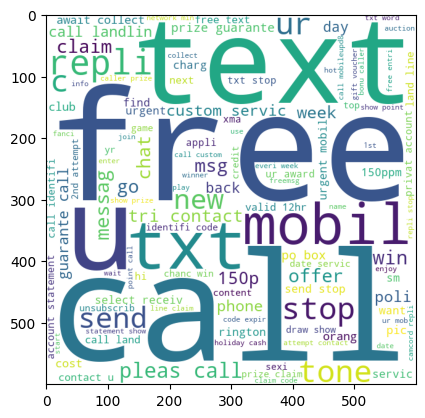

In [41]:
spam_wc = wc.generate(df[df['output'] == 1]['text_transform'].str.cat(sep=" "))
plt.imshow(spam_wc)

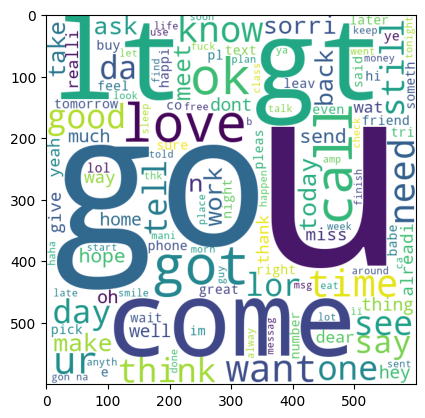

In [42]:
not_spam_wc = wc.generate(df[df['output'] == 0]['text_transform'].str.cat(sep=" "))
plt.imshow(not_spam_wc)

In [43]:
spam_corpus = []
for msg in df[df['output'] == 1]['text_transform'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

9939

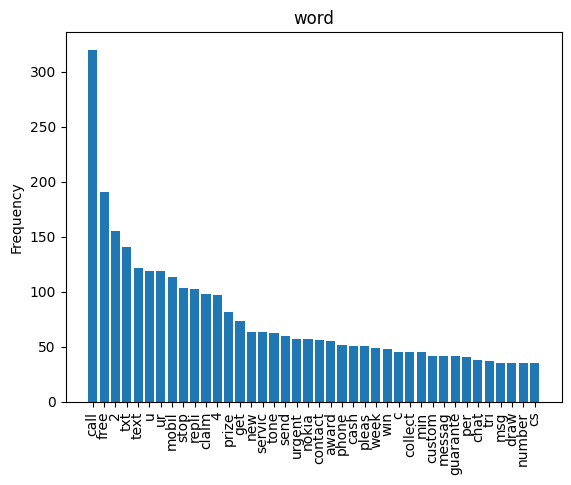

In [45]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(40))[0],pd.DataFrame(Counter(spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.title('word')
plt.show()

In [46]:
not_spam_corpus = []
for msg in df[df['output'] == 0]['text_transform'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

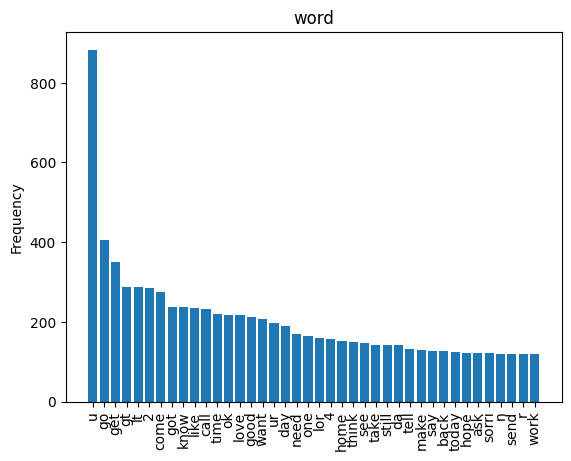

In [47]:
plt.bar(pd.DataFrame(Counter(not_spam_corpus).most_common(40))[0],pd.DataFrame(Counter(not_spam_corpus).most_common(40))[1])
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.title('word')
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
X = cv.fit_transform(df['text_transform']).toarray()

In [50]:
X.shape

(5169, 6708)

In [51]:
y = df['output'].values

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB,  MultinomialNB

In [55]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [57]:
def bagOfWords(X_train, y_train):
    X_train = X_train
    y_train = y_train
    print("BAG OF WORDS")
    mnb.fit(X_train,y_train)
    y_pred1 = mnb.predict(X_test)
    print(f"Accuracy Score of MNB {accuracy_score(y_test,y_pred1)}")
    print(f"Precision Score of MNB {precision_score(y_test,y_pred1)}")
    
    bnb.fit(X_train,y_train)
    y_pred2 = bnb.predict(X_test)
    print(f"Accuracy Score of BNB {accuracy_score(y_test,y_pred2)}")
    print(f"Precision Score of BNB {precision_score(y_test,y_pred2)}")
    
    gnb.fit(X_train,y_train)
    y_pred3 = gnb.predict(X_test)
    print(f"Accuracy Score of GNB {accuracy_score(y_test,y_pred3)}")
    print(f"Precision Score of GNB {precision_score(y_test,y_pred3)}")

In [58]:
bagOfWords(X_train,y_train)

BAG OF WORDS
Accuracy Score of MNB 0.9642166344294004
Precision Score of MNB 0.8344370860927153
Accuracy Score of BNB 0.9700193423597679
Precision Score of BNB 0.9734513274336283
Accuracy Score of GNB 0.8800773694390716
Precision Score of GNB 0.5315315315315315


In [59]:
X1 = tfidf.fit_transform(df['text_transform']).toarray()

In [60]:
X1.shape

(5169, 3000)

In [61]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.2,random_state=2)

In [62]:
def TFIDF(X_train, y_train):
    
    print("TFIDF")
    mnb.fit(X_train,y_train)
    y_pred1 = mnb.predict(X1_test)
    print(f"Accuracy Score of MNB {accuracy_score(y1_test,y_pred1)}")
    print(f"Precision Score of MNB {precision_score(y1_test,y_pred1)}")
    
    bnb.fit(X_train,y_train)
    y_pred2 = bnb.predict(X1_test)
    print(f"Accuracy Score of BNB {accuracy_score(y1_test,y_pred2)}")
    print(f"Precision Score of BNB {precision_score(y1_test,y_pred2)}")
    
    gnb.fit(X_train,y_train)
    y_pred3 = gnb.predict(X1_test)
    print(f"Accuracy Score of GNB {accuracy_score(y1_test,y_pred3)}")
    print(f"Precision Score of GNB {precision_score(y1_test,y_pred3)}")

In [63]:
TFIDF(X1_train,y1_train)

TFIDF
Accuracy Score of MNB 0.9709864603481625
Precision Score of MNB 1.0
Accuracy Score of BNB 0.9835589941972921
Precision Score of BNB 0.991869918699187
Accuracy Score of GNB 0.8694390715667312
Precision Score of GNB 0.5068493150684932
